In [250]:
import os
import json
import pandas as pd
import collections
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

%matplotlib inline  

In [223]:
with open('input.json') as json_data:
    graph = json.load(json_data)

print(graph)

[{'0': '1'}, {'1': '2'}, {'1': '5'}, {'2': '1'}, {'2': '3'}, {'3': '2'}, {'3': '4'}, {'4': '3'}, {'4': '5'}, {'5': '1'}, {'5': '4'}, {'4': '6'}, {'6': '7'}]


In [224]:
# convert keys to integers
elist = []
for i, val in enumerate(graph):
    keys = list(graph[i].keys())[0]
    e1 = int(graph[i][keys])
    e2 = int(keys)
    #print((e1, e2))
    elist.append((e1, e2, ))

In [225]:
elist

[(1, 0),
 (2, 1),
 (5, 1),
 (1, 2),
 (3, 2),
 (2, 3),
 (4, 3),
 (3, 4),
 (5, 4),
 (1, 5),
 (4, 5),
 (6, 4),
 (7, 6)]

In [226]:
#elist = [(1, 2), (2, 3), (1, 4), (4, 2)]

In [227]:
G = nx.Graph()
G.add_edges_from(elist)

In [228]:
G.edges()

[(1, 0), (1, 2), (1, 5), (2, 3), (5, 4), (3, 4), (4, 6), (6, 7)]

C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: 

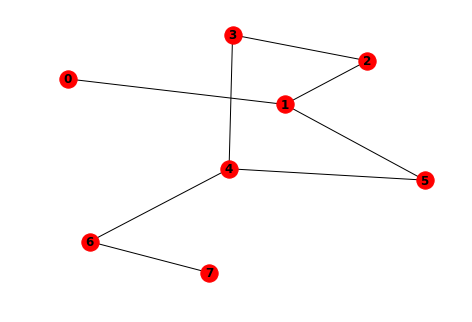

In [242]:
#plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
#plt.subplot(122)
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [237]:
# Inputs
source = 0  # Source node for route finding
targets = G.nodes()  # Target nodes for route finding
targets.remove(0)
print(targets)

[1, 2, 5, 3, 4, 6, 7]


In [241]:
# Create list of all paths to target nodes from source node
paths = []
for target in targets:
    for path in nx.all_simple_paths(G, source=source, target=target):
        paths.append({"source": source, "target": target, "path": path})
        
paths

[{'path': [0, 1], 'source': 0, 'target': 1},
 {'path': [0, 1, 2], 'source': 0, 'target': 2},
 {'path': [0, 1, 5, 4, 3, 2], 'source': 0, 'target': 2},
 {'path': [0, 1, 2, 3, 4, 5], 'source': 0, 'target': 5},
 {'path': [0, 1, 5], 'source': 0, 'target': 5},
 {'path': [0, 1, 2, 3], 'source': 0, 'target': 3},
 {'path': [0, 1, 5, 4, 3], 'source': 0, 'target': 3},
 {'path': [0, 1, 2, 3, 4], 'source': 0, 'target': 4},
 {'path': [0, 1, 5, 4], 'source': 0, 'target': 4},
 {'path': [0, 1, 2, 3, 4, 6], 'source': 0, 'target': 6},
 {'path': [0, 1, 5, 4, 6], 'source': 0, 'target': 6},
 {'path': [0, 1, 2, 3, 4, 6, 7], 'source': 0, 'target': 7},
 {'path': [0, 1, 5, 4, 6, 7], 'source': 0, 'target': 7}]

In [255]:
list(combinations(range(len(paths)), 3))

# combinations('ABCD', 2) --> AB AC AD BC BD CD
# combinations(range(4), 3) --> 012 013 023 123

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 1, 11),
 (0, 1, 12),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 2, 10),
 (0, 2, 11),
 (0, 2, 12),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 3, 10),
 (0, 3, 11),
 (0, 3, 12),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 4, 10),
 (0, 4, 11),
 (0, 4, 12),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 5, 10),
 (0, 5, 11),
 (0, 5, 12),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 6, 10),
 (0, 6, 11),
 (0, 6, 12),
 (0, 7, 8),
 (0, 7, 9),
 (0, 7, 10),
 (0, 7, 11),
 (0, 7, 12),
 (0, 8, 9),
 (0, 8, 10),
 (0, 8, 11),
 (0, 8, 12),
 (0, 9, 10),
 (0, 9, 11),
 (0, 9, 12),
 (0, 10, 11),
 (0, 10, 12),
 (0, 11, 12),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 2, 7),
 (1, 2, 8),
 (1, 2, 9),
 (1, 2, 10),
 (1, 2, 11),
 (1, 2, 12),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 3, 7),
 (1,

In [248]:
# Create path combinations to all target nodes
path2 = []
# Loop for all targets
for target in targets:
    # Loop for all paths
    for path in paths:
        # Check if target in path objects matches list iterator
        if path['target'] == target:
            print('target: ' + str(target))
            print('path: ' + str(path['path']))
            print('')
    

target: 1
path: [0, 1]

target: 2
path: [0, 1, 2]

target: 2
path: [0, 1, 5, 4, 3, 2]

target: 5
path: [0, 1, 2, 3, 4, 5]

target: 5
path: [0, 1, 5]

target: 3
path: [0, 1, 2, 3]

target: 3
path: [0, 1, 5, 4, 3]

target: 4
path: [0, 1, 2, 3, 4]

target: 4
path: [0, 1, 5, 4]

target: 6
path: [0, 1, 2, 3, 4, 6]

target: 6
path: [0, 1, 5, 4, 6]

target: 7
path: [0, 1, 2, 3, 4, 6, 7]

target: 7
path: [0, 1, 5, 4, 6, 7]



In [263]:
for target in targets:
    print(target)

1
2
5
3
4
6
7


In [262]:
# Create combined options for all paths

G1 = nx.Graph()
edges1 = (paths[0]['path'])
for edge1 in edges1:
    print(edge1)
G1.add_edges_from([(0, 1)])

0
1


In [260]:
G2 = nx.Graph()
#G2.add_edges_from(paths[1]['path'])
G2.add_edges_from([(0, 1), (1, 2)])

F = nx.compose(G1, G2)

C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: 

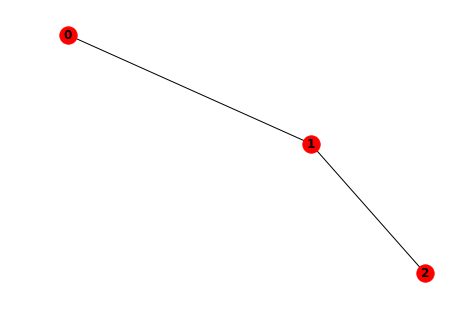

In [261]:
nx.draw(F, with_labels=True, font_weight='bold')

In [258]:
paths[0]['path']

[0, 1]

In [259]:
paths[1]['path']

[0, 1, 2]